# Traction Analysis of Free Mobile Apps

This project presents a simple analysis to determine popularity and user satisfaction of free apps in the App Store and Google Play Store with an emphasis on app genres. The focus here is free apps that rely on advertisements for revenue generation. The main idea behind the analysis is to provide data-driven decisions that help app developers idenfity the type of apps that would likely to gain traction among users and present opportunities for ad generated revenues.

## Introduction to Data Sets
The data used in this project is a subset of over five million apps that are available in both stores. There are two sources of data sets that are freely available online and can be used as sample without incurring additional time and cost that would be required to compile data sets for the entire market.

* The [first data set](https://www.kaggle.com/lava18/google-play-store-apps) contains over 10800 Android apps from Google Play Store and is available for download [here](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv)

* The [second data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) contains close to 7200 iOS apps from the App Store and is available for download [here](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)

##  Initial Exploration of the Data

We will start by opening the data sets and exploring the basic information contained in them.


In [1]:
from csv import reader

opened_file_ios = open('AppleStore.csv', encoding='utf8')
read_file_ios = reader(opened_file_ios)
ios = list(read_file_ios)

opened_file_android = open('googleplaystore.csv', encoding='utf8')
read_file_android = reader(opened_file_android)
android = list(read_file_android)

We can further separate header from the rest of the data for ease of use.

In [2]:
ios_header = ios[0]
ios = ios[1:]

android_header = android[0]
android = android[1:]

To make exploring data more efficiently in the future we can create a reusable function called `explore_data()` which takes in four parameters: the dataset, the beginning and ending indices for the dataset, and the size of the dataset in total number of columns and rows.

In [3]:
def explore_data(dataset, start, end, total_rows_columns = False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    
    if total_rows_columns:
        print('Total number of rows: ', len(dataset))
        print('Total number of columns: ', len(dataset[0]))

print(ios_header)
print('\n')
explore_data(ios, 0, 5, True)

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['4', '282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['5', '282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37'

The header gives us an idea about which of the 17 columns  in 7197 rows would be usefuk in our task, such as the genre and ratings.

Now we can take a look at the Android data set.

In [4]:
print(android_header)
print('\n')
explore_data(android, 0, 5, total_rows_columns = True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

For the Android data set we observe 10841 rows and 13 columns, along with slightly more clear labels for headers compared to the iOS data set. The details about each column for the iOS can be reached [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## Data Cleaning

### Removing Inaccurate Data

Since user rating of an app is a fairly important data point and also is defined by upper and lower boundaries of 0 and 5, we can verify if all ratings in both data sets are entered correctly. Furthermore, we can delete the rows that are outside the range. 

We can determine the ratings by looking at the headers. In this case, the user rating corresponds to index 8 in iOS data set and index 2 in Android data set.

In [5]:
for index, row in enumerate(ios):
    rating = float(row[8])
    if rating  > 5.0 or rating < 0.0:
        print('Index of row to be deleted - iOS: ', index)
        
for index, row in enumerate(android):
    rating = float(row[2])
    if rating  > 5.0 or rating < 0.0:
        print('Index of row in to be deleted - Android: ', index)


Index of row in to be deleted - Android:  10472


Now we can delete the app using the index number and verify if the row is indeed deleted. (Note that if there were multiple indices to be deleted, we would collect all indices in another list and delete them using a loop.) When we print the index of the delete row as well as rows before and after, we see that the row with incorrect data is deleted.

In [6]:
del android[10472]
print (android[10471:10473])

[['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up'], ['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']]


### Removing Duplicate Entries

Given the size of data sets it would not be particularly unusual to have some duplicate entries which should be cleaned up. To identify duplicate entries and separate them from the unique entries we can create two lists that store both types.

In [7]:
unique_android = []
duplicate_android = []

for app in android:
    name = app[0]
    if name in unique_android:
        duplicate_android.append(name)
    else:
        unique_android.append(name)

print('Total number of duplicate entries: ', len(duplicate_android))
print('\n')
print('First 20 duplicate entries: \n', duplicate_android[0:20])


Total number of duplicate entries:  1181


First 20 duplicate entries: 
 ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software', 'MailChimp - Email, Marketing Automation', 'Crew - Free Messaging and Scheduling', 'Asana: organize team projects', 'Google Analytics', 'AdWords Express']


We can do a quick spot check to search for some clues as to the reason behind the duplicates. By doing so we observe that some of the entries are identical whereas others differ in certain fields.

In [8]:
for app in android:
    if app[0] == 'Box':
        print(app)
        
print('\n')

for app in android:
    if app[0] == 'Google Allo':
        print(app)        

['Box', 'BUSINESS', '4.2', '159872', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Box', 'BUSINESS', '4.2', '159872', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Box', 'BUSINESS', '4.2', '159872', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 31, 2018', 'Varies with device', 'Varies with device']


['Google Allo', 'COMMUNICATION', '4.3', '346982', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Communication', 'January 23, 2018', 'Varies with device', '4.1 and up']
['Google Allo', 'COMMUNICATION', '4.3', '346980', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Communication', 'January 23, 2018', 'Varies with device', '4.1 and up']
['Google Allo', 'COMMUNICATION', '4.3', '347086', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 

Here we observe that the app named 'Box' contains identical entries, whereas entries for the 'Google Allo' app differ in total number of ratings (fourth index). This implies that the data for entries were collected on different dates and that the entry with the highest number indicates the most recent data. This helps us determine how to delete duplicate entries, in other words the criterion we want to follow in removing duplicates. Since we would like to keep the most recent entry with more data points, we can proceed with the removing process that consists of:

1. Creating a dictionary to store a single entry for duplicate entries 
2. Collecting all android apps under one list

Let's start with creating and populating the dictionary.

In [9]:
reviews_max = {}

for app in android:
    name = app[0]
    review_count = float(app[3])
    if name not in reviews_max:
        reviews_max[name] = review_count
    elif reviews_max[name] < review_count:
        reviews_max[name] = review_count

We can confirm that the `reviews_max{}` contains only one entry for the previously duplicate entries:

In [10]:
print('Entry for \'Google Allo\':' ,reviews_max['Google Allo'])
print('Length of original list without duplicates:', len(android)-1181)
print('Length of dictionary:',len(reviews_max))

Entry for 'Google Allo': 347086.0
Length of original list without duplicates: 9659
Length of dictionary: 9659


As we can see from the first print statement the 'Google Allo' app returns the highest rating count of the three values associated with the app previously.

Also, the length of original android list subtracted by duplicate numbers indeed match with the length of the dictionary we just created.


In [11]:
android_updated=[]
name_added=[]

for app in android:
    name = app[0]
    review_count = float(app[3])
    if (name not in name_added) and (review_count == reviews_max[name]):
        android_updated.append(app)
        name_added.append(name)
    
len(android_updated)    

9659

Now let's confirm the length of the data set is 9,656 and print the first and last three entries in our updated list.

In [12]:
print('First three entries in the list:')
explore_data(android_updated, 0, 3, True)

First three entries in the list:
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Total number of rows:  9659
Total number of columns:  13


### Removing Non-English Entries

Since our audience consists of an English-speaking audience we will consider removing non-English apps from our list. One straightforward way of doing this is by determining whether the app name contains non-ASCII characters.

We can develop a function to examine if a string contains non-ASCII characters by using the built-in `ord()` function. Furthermore, since some of the English apps contain characters outside the ASCII standard such as emojis, ™, em and en dashes, etc., we may want to have some flexibility and allow 3 non-ASCII characters in order to minimize loss of data for English apps that use non-English characters.

In [13]:
def is_english(string):
    count = 0
    for ch in string:
        if ord(ch) > 127 and count < 3:
            count += 1
        elif ord(ch) > 127 and count >= 3:
            return False
    return True

print(is_english('电视剧热播'))
print(is_english('Instagram'))


False
True


Although this function is still far from being perfect, it is unlikely that it will remove more than a few English apps and should suffice for our analysis at this point. 

Now we can use the function we built to remove non-English apps from our list.

In [14]:
android_english = []
ios_english = []

for app in android_updated:
    name = app[0]
    if is_english(name):
        android_english.append(app)

for app in ios:
    name = app[2]
    if is_english(name):
        ios_english.append(app)

explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Total number of rows:  9614
Total number of columns:  13


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'U

The removal of non-English titles reduced the number of Android apps from 9659 to 9614 and iOS apps from 7197 to 6183. The mismatch in removal ratio between Android apps and iOS apps is an interesting topic in itself which might suggest the North American focus of Android, but such discussion is beyond the scope of our analysis. 

### Extracting Free Apps

Since our focus is geared towards free apps that generate revenue from advertisements, we should limit our data set to include only such apps.

In [15]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)

for app in ios_english:
    price = app[5]
    if price == '0':
        ios_final.append(app)

print(len(android_final))
print(len(ios_final))

8864
3222


We see that the final data sets for the Android and iOS apps contain 8864 and 3222 entries, respectively. Since we have completed the data cleaning by removing inaccurate data and duplicate entries, and isolated our sets to English and free apps, we can continue with our analysis.

## Genre Distribution

As mentioned in the introduction, our goal for this project is to determine the types of apps that are most appealing to both Android and iOS users which would reflect in downloads and the ad revenue. We can start by examining the most common genres and the genre distribution for each data set. We can achieve this by creating dictionaries to form frequency tables for `prime_genre` for iOS and `Category` and `Genres` attributes which indicate the percentages for categories/genres.

Below we will build two functions, one for creating frequency tables with percentages and the other to display the percentages in descending order.

In [16]:
def freq_table(dataset, index):
    ft = {}
    for row in dataset:
        key = row[index]
        if key in ft:
            ft[key] += 1
        else:
            ft[key] = 1
    
    total = len(dataset)
    pt = {}
    for key in ft:
        percentage = round(ft[key] / total * 100, 2)
        pt[key] = percentage
    
    return pt

def freq_table_ordered (dataset, index, descending=False):
    table = freq_table(dataset, index)
    table_display =[]
    for key in table:
        pair_as_tuple = (table[key], key)
        table_display.append(pair_as_tuple)
    
    if descending == True:
        table_sorted = sorted(table_display, reverse = True)
    else:
        table_sorted = sorted(table_display)
    
    for entry in table_sorted:
        print(entry[1], ':', entry[0])  

We can now examine the `prime_genre` field in the iOS data set.

In [17]:
freq_table(ios_final, 12)

{'Productivity': 1.74,
 'Weather': 0.87,
 'Shopping': 2.61,
 'Reference': 0.56,
 'Finance': 1.12,
 'Music': 2.05,
 'Utilities': 2.51,
 'Travel': 1.24,
 'Social Networking': 3.29,
 'Sports': 2.14,
 'Health & Fitness': 2.02,
 'Games': 58.16,
 'Food & Drink': 0.81,
 'News': 1.33,
 'Book': 0.43,
 'Photo & Video': 4.97,
 'Entertainment': 7.88,
 'Business': 0.53,
 'Lifestyle': 1.58,
 'Education': 3.66,
 'Navigation': 0.19,
 'Medical': 0.19,
 'Catalogs': 0.12}

We can also view the distribution on a bar chart, as it is often helpful to view the information visually. In order to do so, we would need to import the pandas and pyplot libraries and convert our dictionary to a dataframe.

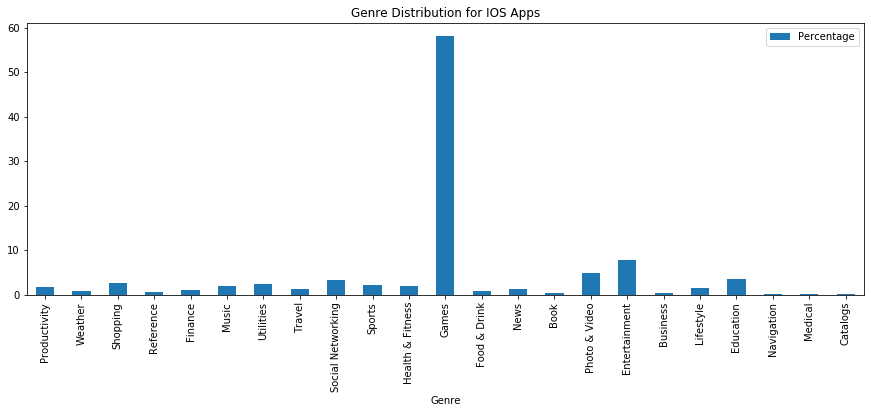

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

ios_gen_ft = freq_table(ios_final, 12)
ios_gen_ft = pd.DataFrame(ios_gen_ft.items(), columns=['Genre', 'Percentage'])
ios_gen_ft.plot(x='Genre', y='Percentage', kind='bar', figsize=(15,5), title='Genre Distribution for IOS Apps')

Since the games genre accounts for the majority, it is difficult to see and interpret rest of the genres from this plot. One way to deal with such issues is to use a logarithmic scale on the vertical axis.

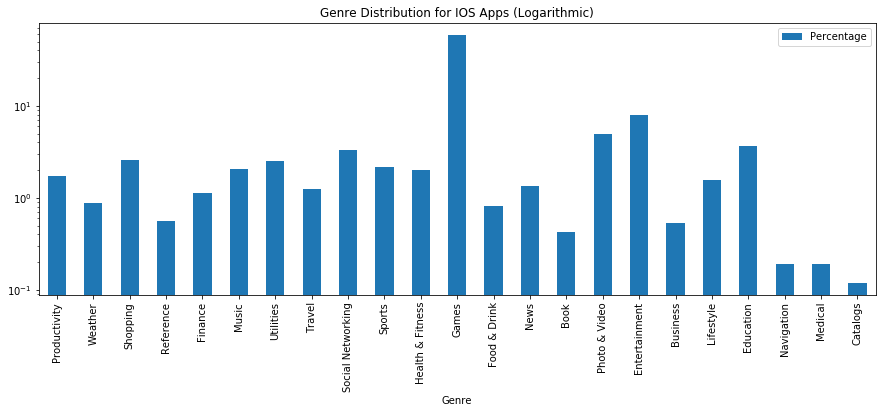

In [19]:
ios_gen_ft.plot(x='Genre', y='Percentage', kind='bar', figsize=(15,5), title='Genre Distribution for IOS Apps (Logarithmic)')
plt.yscale('log')

The chart with the y-axis scaled logarithmically displays the non-game genres more clearly. We see quickly take a glance to see that the most common genres after games is the entertainment, photo&video, and education genres. However, we lose the information on specific percentages in this chart. 

Now let's use the second function, `freq_table_ordered`, that we created earlier, where we can sort the genres by specific percentages.

In [20]:
freq_table_ordered(ios_final, 12, True)

Games : 58.16
Entertainment : 7.88
Photo & Video : 4.97
Education : 3.66
Social Networking : 3.29
Shopping : 2.61
Utilities : 2.51
Sports : 2.14
Music : 2.05
Health & Fitness : 2.02
Productivity : 1.74
Lifestyle : 1.58
News : 1.33
Travel : 1.24
Finance : 1.12
Weather : 0.87
Food & Drink : 0.81
Reference : 0.56
Business : 0.53
Book : 0.43
Navigation : 0.19
Medical : 0.19
Catalogs : 0.12


Here we observe that over half of the free English apps (58.16%) are games. The gap between games and its closest competitor, entertainment with 7.88%, is significant with games holding more than six times the market space in the App Store. Next, we have photo & video (4.97%), education (3.66%) and social networking (3.29%), followed by shopping (2.61%), utilities (2.51%), sports (2.14%), music (2.05%) and health & fitness (2.02%). Rest of the genres are below 2 percent, with all thirteen of them accounting only around 11% of the market.

The table indicates that the large majority of the apps in the App Store are designed for leisure activities, such as games, entertainment, photos/videos, social networking, sports and music. Apps that are designed for practical purposes do not even account for one quarter of the entire market.

It is important to keep in mind that the ubiquity of leisure apps doest not imply they have the greatest number of users; although supply often correlates with demand, we should be cautious to reach such conclusions. 

Let's now take a look at the `Category` and `Genres` columns in the Android data set starting with the categories.

In [21]:
freq_table_ordered(android_final, 1, True)

FAMILY : 18.91
GAME : 9.72
TOOLS : 8.46
BUSINESS : 4.59
LIFESTYLE : 3.9
PRODUCTIVITY : 3.89
FINANCE : 3.7
MEDICAL : 3.53
SPORTS : 3.4
PERSONALIZATION : 3.32
COMMUNICATION : 3.24
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.94
NEWS_AND_MAGAZINES : 2.8
SOCIAL : 2.66
TRAVEL_AND_LOCAL : 2.34
SHOPPING : 2.25
BOOKS_AND_REFERENCE : 2.14
DATING : 1.86
VIDEO_PLAYERS : 1.79
MAPS_AND_NAVIGATION : 1.4
FOOD_AND_DRINK : 1.24
EDUCATION : 1.16
ENTERTAINMENT : 0.96
LIBRARIES_AND_DEMO : 0.94
AUTO_AND_VEHICLES : 0.93
HOUSE_AND_HOME : 0.82
WEATHER : 0.8
EVENTS : 0.71
PARENTING : 0.65
ART_AND_DESIGN : 0.64
COMICS : 0.62
BEAUTY : 0.6


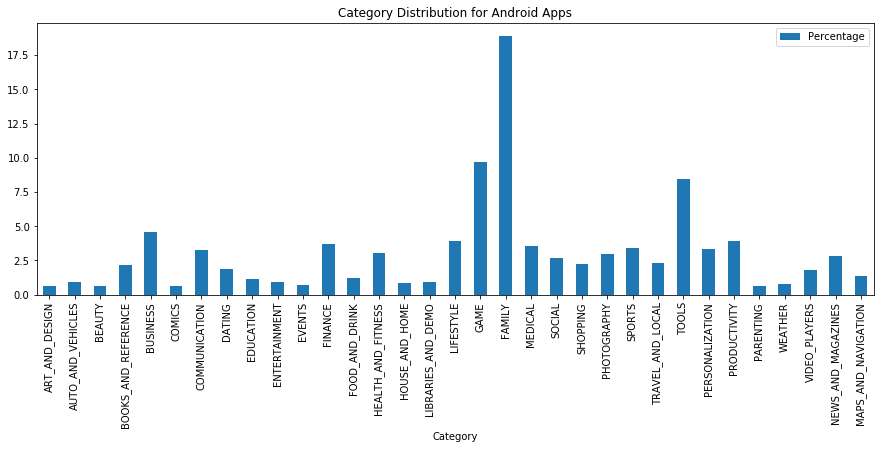

In [22]:
android_cat_ft = freq_table(android_final, 1)
android_cat_ft = pd.DataFrame(android_cat_ft.items(), columns=['Category', 'Percentage'])
android_cat_ft.plot(x='Category', y='Percentage', kind='bar', figsize=(15,5), title='Category Distribution for Android Apps')

Upon reviewing the result, we observe a stark disparity between the games genre in the App Store and the games category in the Google Play. The former holds more than half of all genres whereas the latter does not even account for 10 percent. After this initial observation, we also realize that categories and genres in each store do not align very well. Two of the top three categories in the Android data set, family and tools, are entirely missing in the iOS data set. This is understandable as the methods used for collection, organization and presentation for each data set are different. We can, however, try to gain additional insights by looking into the `Genres` column in the hopes that it will complement the current table, or at least provide additional information for us to make better comparisons.

In [23]:
freq_table_ordered(android_final, 9, True)

Tools : 8.45
Entertainment : 6.07
Education : 5.35
Business : 4.59
Productivity : 3.89
Lifestyle : 3.89
Finance : 3.7
Medical : 3.53
Sports : 3.46
Personalization : 3.32
Communication : 3.24
Action : 3.1
Health & Fitness : 3.08
Photography : 2.94
News & Magazines : 2.8
Social : 2.66
Travel & Local : 2.32
Shopping : 2.25
Books & Reference : 2.14
Simulation : 2.04
Dating : 1.86
Arcade : 1.85
Video Players & Editors : 1.77
Casual : 1.76
Maps & Navigation : 1.4
Food & Drink : 1.24
Puzzle : 1.13
Racing : 0.99
Role Playing : 0.94
Libraries & Demo : 0.94
Auto & Vehicles : 0.93
Strategy : 0.91
House & Home : 0.82
Weather : 0.8
Events : 0.71
Adventure : 0.68
Comics : 0.61
Beauty : 0.6
Art & Design : 0.6
Parenting : 0.5
Card : 0.45
Casino : 0.43
Trivia : 0.42
Educational;Education : 0.39
Board : 0.38
Educational : 0.37
Education;Education : 0.34
Word : 0.26
Casual;Pretend Play : 0.24
Music : 0.2
Racing;Action & Adventure : 0.17
Puzzle;Brain Games : 0.17
Entertainment;Music & Video : 0.17
Casual;

Since the dictionary above contains 114 items, we will limit it to genres that account for at least 3 percent. Also, we can present this in a pie chart, which would not have been possible with the bar chart above (android category distribution) given the large number of categories it had. It is important to keep in mind that the percentages in the pie chart are not absolute but relative; in other words, the percentages represent the share among the top 13 genres.

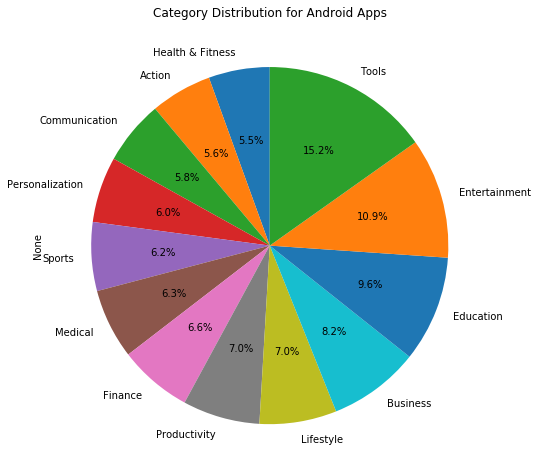

In [24]:
android_gen_ft = freq_table(android_final, 9)
android_gen_ft = pd.Series(android_gen_ft).sort_values()
android_gen_ft = android_gen_ft[android_gen_ft>3]
android_gen_ft.plot.pie(figsize=(8,12), title='Category Distribution for Android Apps', autopct='%1.1f%%', startangle=90)

It is not obvious from the tables and plots above how the category and genre columns are related to each other except that the genre table is more granular. It also does not seem to provide information to complement what we have already observed earlier. Furthermore, the granularity makes it difficult to make meaningful inferences and there appears to be conflicting information between the tables. For example, the entertainment for the categories table returns 0.96% whereas the entertainment for the genres table returns 6.07%. Perhaps this would be more understandable if the table with less entries had a higher portion of the percentages; after all there are more entries the percentages would have to be distributed, but in this case it appears to be the opposite.

In any case, it would serve our goals better to continue with the categories rather than genres table, which matches closer to the iOS genre table in size and the degree of refinement.

One last point before we move on is that upon examining the [Google Play website](https://play.google.com/store/apps/category/FAMILY) closer, we see that the Family category, in fact, subsumes games designed for children, which might partially explain the discrepancy between the popularity of games in iOS and Android data sets.

So far, we have observed that the App Store is dominated by apps that we can label as for leisure, in particular games that account for more than half of the apps, whereas Google Play is more balanced and does not display such a prominent tilt towards any category. 

## Installation Numbers and Rating Count by Genre

As we already mentioned, although the distribution of genres of available apps provides us with the supply side of the market, it does not necessarily fully correlate with the demand side. One way to approach this is to examine the number of downloads which reveals the user interest in the products. The Google Play data set contains a column named `Installs` which is exactly what we are looking for. However, such information is missing in the App Store data set. Observing the columns in this data set we see a column named `rating_count_tot`, which indicates the total number of ratings for a given app. This would presumably give us a smaller number of data points compared to installations as not every user who installs the app leaves a rating on the website, but it should suffice as a substitute to total number of downloads for our purposes.

### Genre Rating Count on the App Store

We can utilize the rating counts entered for each app to calculate the average number of user ratings 'per' app genre in the App Store. In other words, we could collate all apps in specific genres and add the rating count for each app to corresponding genre. However, this would give us total rating counts for genres, but since each genre has different number of apps, it would not give us the average rating count per app, which would require us to divide the numbers by total app counts within each genre.

In [25]:
genres_ios = freq_table(ios_final, 12)

genres_ratings_ios = {}

for genre in genres_ios:
    rating_total = 0
    app_count = 0
    for app in ios_final:
        genre_app = app[12]
        rating_count = float(app[6])
        if genre_app == genre:
            rating_total += rating_count
            app_count += 1
    rating_avg = int(rating_total / app_count)
    genres_ratings_ios[genre] = rating_avg

genres_ratings_ios


# It is also possible to achieve this by utilizing pandas:
#
# ios_final_df = pd.read_csv('AppleStore.csv')
# ios_gen_rc = ios_final_df[['prime_genre','rating_count_tot']]
# ios_gen_rc_total = ios_gen_rc.drop_duplicates().groupby('prime_genre').agg(sum)
# ios_gen_count = ios_gen_rc.drop_duplicates().groupby('prime_genre').count()
# ios_gen_rc_per_genre = ios_gen_rc_tot/ios_gen_count
#
# (Note that the dataset has to be cleaned as we did earlier for the results to match)

{'Productivity': 21028,
 'Weather': 52279,
 'Shopping': 26919,
 'Reference': 74942,
 'Finance': 31467,
 'Music': 57326,
 'Utilities': 18684,
 'Travel': 28243,
 'Social Networking': 71548,
 'Sports': 23008,
 'Health & Fitness': 23298,
 'Games': 22788,
 'Food & Drink': 33333,
 'News': 21248,
 'Book': 39758,
 'Photo & Video': 28441,
 'Entertainment': 14029,
 'Business': 7491,
 'Lifestyle': 16485,
 'Education': 7003,
 'Navigation': 86090,
 'Medical': 612,
 'Catalogs': 4004}

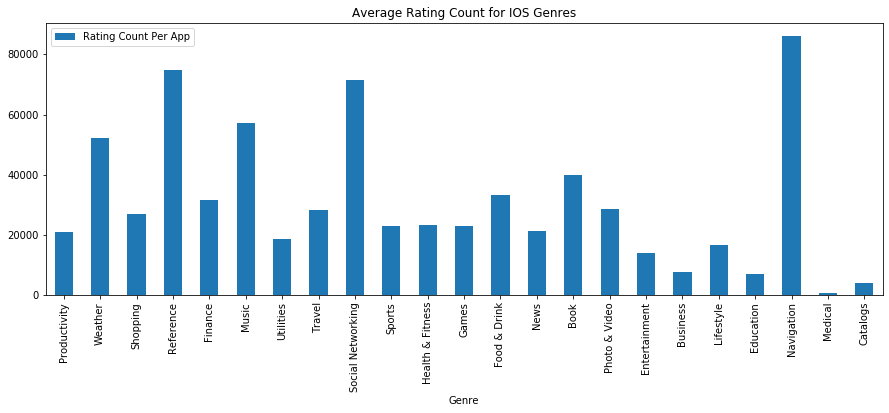

In [26]:
genres_ratings_ios_df = pd.DataFrame(genres_ratings_ios.items(), columns=['Genre', 'Rating Count Per App'])
genres_ratings_ios_df.plot(x='Genre', y='Rating Count Per App', kind='bar', figsize=(15,5), title='Average Rating Count for IOS Genres')

The highest number of user reviews per app is found in the navigation apps, followed by reference, social networking, music, weather, book, and food & drink. At this point it is important to consider if the data is heavily skewed towards a select few apps. Let's examine the navigation genre and obtain the apps that have over 10000 ratings to see the extent of their presence in the total rating count for all navigation apps.

In [27]:
total_nav_rating = 0
for app in ios_final:
    rating_count = int(app[6])
    genre = app[12]
    if genre == 'Navigation' and rating_count > 50000:
        name = app[2]
        print(name, ':', rating_count)
    if genre == 'Navigation':
        total_nav_rating += rating_count

print('Total ratings in Navigation: ', total_nav_rating)
print('Rating percentage of top two apps for navigation:', ((345046+154911)/total_nav_rating) * 100)

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Total ratings in Navigation:  516542
Rating percentage of top two apps for navigation: 96.78922527112994


Here we see that over 95% of all reviews for navigation genre are made for either Waze or Google Maps, which heavily skew the data. Unless the app developer is aspiring to compete with these two companies, the information obtained here, namely that navigation is the most popular genre, is not particularly useful. Similarly, social networking apps and music apps are dominated by a few multinational comapnies, such as Facebook, Pinterest, Skype, Pandora and Spotify, etc. 

While our goal here is to help potential app developers identify genres that seem to hold traction among users, we should also be mindful of the fact that large corporations tend to skew the data we have. Therefore, it might be useful to examine the top rating holders for the genres we are exploring. Since reference is the genre that contains the highest number of reviews after navigation, let's explore the top apps in the reference genre in terms of total rating count. However, before we do so, we can build a function to make the code reusable if we want to explore other genres.

In [28]:
def top_ratings_percentage(dataset, genre, count_above, name_index, genre_index, rating_index):
    count = 1
    for g in genre:
        total_genre_rating = 0
        total_rating_chosen = 0
        for entry in dataset:
            rating_count = int(entry[rating_index])
            entry_genre = entry[genre_index]
            if entry_genre == g and rating_count > count_above:
                name = entry[name_index]
                print(name, ':', rating_count)
                total_rating_chosen += rating_count
            if entry_genre == g:
                total_genre_rating += rating_count
        print('Total genre rating count:', total_genre_rating)
        print('Rating percentage:', round((total_rating_chosen / total_genre_rating) * 100,2), "%")
        if count != len(genre): # for proper spacing in output
            print('\n')
        count += 1

top_ratings_percentage(ios_final, ['Reference'], 200000, 2, 12, 6)

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Total genre rating count: 1348958
Rating percentage: 87.92 %


The outcome for reference seems slightly better as the top two apps in rating count, each of which have over 200,000 ratings, hold around 88% of the total ratings in the genre. Given the high competitive landscape in social networking and music genres, as well as the dominance of few global companies, it might serve use better to continue with the next three genres, weather, book, and food & drink.

In [29]:
top_ratings_percentage(ios_final, ['Weather', 'Food & Drink'], 200000, 2, 12, 6)
print('\n')
top_ratings_percentage(ios_final, ['Book'], 100000, 2, 12, 6)

The Weather Channel: Forecast, Radar & Alerts : 495626
The Weather Channel App for iPad – best local forecast, radar map, and storm tracking : 208648
Total genre rating count: 1463837
Rating percentage: 48.11 %


Starbucks : 303856
Domino's Pizza USA : 258624
Total genre rating count: 866682
Rating percentage: 64.9 %


Kindle – Read eBooks, Magazines & Textbooks : 252076
Audible – audio books, original series & podcasts : 105274
Total genre rating count: 556619
Rating percentage: 64.2 %


All three genres have considerably lower percentages for the top two apps compared to navigation and reference genres. The most favorable here seems to be the weather genre, as the top 2 apps account for less than 50% of all apps. It would be interesting to lower the number we set for counts to see how many apps and what percentage of those apps account for say, 120000 reviews instead of 200000 we used above.

In [30]:
top_ratings_percentage(ios_final, ['Weather'], 120000, 2, 12, 6)

WeatherBug - Local Weather, Radar, Maps, Alerts : 188583
The Weather Channel: Forecast, Radar & Alerts : 495626
AccuWeather - Weather for Life : 144214
MyRadar NOAA Weather Radar Forecast : 150158
The Weather Channel App for iPad – best local forecast, radar map, and storm tracking : 208648
Total genre rating count: 1463837
Rating percentage: 81.1 %


We see that there are five apps that have at least 120000 reviews and collectively they hold a little over 81% of the market, which is promising. This percentage is still much better than the percentages of top two apps in navigation with 97% and reference with 88% distribution and indicates a relative lack of select few company dominanating the landscape.

The data above indicates a relative lack of select few companies dominating the landscape in the weather genre. This provides an opportunity for an app developer to be able to penetrate into the market and potentially generate enoguh interest in the genre to be profitable, therefore, it appears to be the most suitable genre based on our analysis. Finally, we can build a function that would reveal the average rating for all apps in a select genre.

In [31]:
def ratings_average (dataset, genre, name_index, genre_index, rating_index):
    total_genre_rating = 0
    count = 0
    for entry in dataset:
        rating = float(entry[rating_index])
        entry_genre = entry[genre_index]
        if entry_genre == genre:
            total_genre_rating += rating
            count += 1
    print(genre, ':', round(total_genre_rating / count, 2))

ratings_average(ios_final, 'Weather', 2, 12, 8)

Weather : 3.48


Here we see that in average weather apps have a rating of 3.48. This information is not particularly useful without knowing the ratings of apps in other genres. To contextualize, now let's compare that with the other top apps we discussed above.

In [32]:
top_rating_count_apps_ios = ['Navigation', 'Reference', 'Social networking', 'Music', 'Book', 'Food & Drink']
for genre in genres_ios:
    if genre in top_rating_count_apps_ios:
        ratings_average(ios_final, genre, 2, 12, 8)

Reference : 3.67
Music : 3.95
Food & Drink : 3.63
Book : 3.07
Navigation : 3.83


Of the six top genres, we see that weather app has the second lowest rating, which further supports the idea that this might be a genre worth developing an app for given that user's have a low satisfaction rate. A new app in this genre has a higher potential to fill the gap in user expectations.

### Installation Count on the Play Store

Now we can examine the popularity of apps in Play Store by looking at the average number of downloads per app for each category. One challenge in this case is that the `Installs` column does not contain precise numeric values but ranges. Let's take a look at the existing ranges and the corresponding percentages for the Android data set.

In [33]:
installs_android = freq_table_ordered(android_final, 5, True)

1,000,000+ : 15.73
100,000+ : 11.55
10,000,000+ : 10.55
10,000+ : 10.2
1,000+ : 8.39
100+ : 6.92
5,000,000+ : 6.83
500,000+ : 5.56
50,000+ : 4.77
5,000+ : 4.51
10+ : 3.54
500+ : 3.25
50,000,000+ : 2.3
100,000,000+ : 2.13
50+ : 1.92
5+ : 0.79
1+ : 0.51
500,000,000+ : 0.27
1,000,000,000+ : 0.23
0+ : 0.05
0 : 0.01


There are 21 installation ranges including 0. As we don't need a high degree of precision for our purposes, using a range instead of specific numbers should not constitute an issue. However, we will need to convert these to numeric values to be able to perform computations (summation, division, etc.) by removing the non-numeric characters of plus and comma. We will leave the numbers as defined by their lower range and represent the categories in millions.

In [34]:
categories_android = freq_table(android_final, 1)

category_inst_android = {}

for category in categories_android:
    total_installs = 0
    app_count = 0
    for app in android_final:
        category_app = app[1]
        installs = app[5]
        if category_app == category:
            installs = installs.replace('+', '')
            installs = installs.replace(',','')
            total_installs += float(installs)
            app_count += 1
    avg_installs = round(((total_installs / app_count) / 1000000 ), 2) # in millions
    category_inst_android[category] = avg_installs

category_inst_android

{'ART_AND_DESIGN': 1.99,
 'AUTO_AND_VEHICLES': 0.65,
 'BEAUTY': 0.51,
 'BOOKS_AND_REFERENCE': 8.77,
 'BUSINESS': 1.71,
 'COMICS': 0.82,
 'COMMUNICATION': 38.46,
 'DATING': 0.85,
 'EDUCATION': 1.83,
 'ENTERTAINMENT': 11.64,
 'EVENTS': 0.25,
 'FINANCE': 1.39,
 'FOOD_AND_DRINK': 1.92,
 'HEALTH_AND_FITNESS': 4.19,
 'HOUSE_AND_HOME': 1.33,
 'LIBRARIES_AND_DEMO': 0.64,
 'LIFESTYLE': 1.44,
 'GAME': 15.59,
 'FAMILY': 3.7,
 'MEDICAL': 0.12,
 'SOCIAL': 23.25,
 'SHOPPING': 7.04,
 'PHOTOGRAPHY': 17.84,
 'SPORTS': 3.64,
 'TRAVEL_AND_LOCAL': 13.98,
 'TOOLS': 10.8,
 'PERSONALIZATION': 5.2,
 'PRODUCTIVITY': 16.79,
 'PARENTING': 0.54,
 'WEATHER': 5.07,
 'VIDEO_PLAYERS': 24.73,
 'NEWS_AND_MAGAZINES': 9.55,
 'MAPS_AND_NAVIGATION': 4.06}

(0, 42)

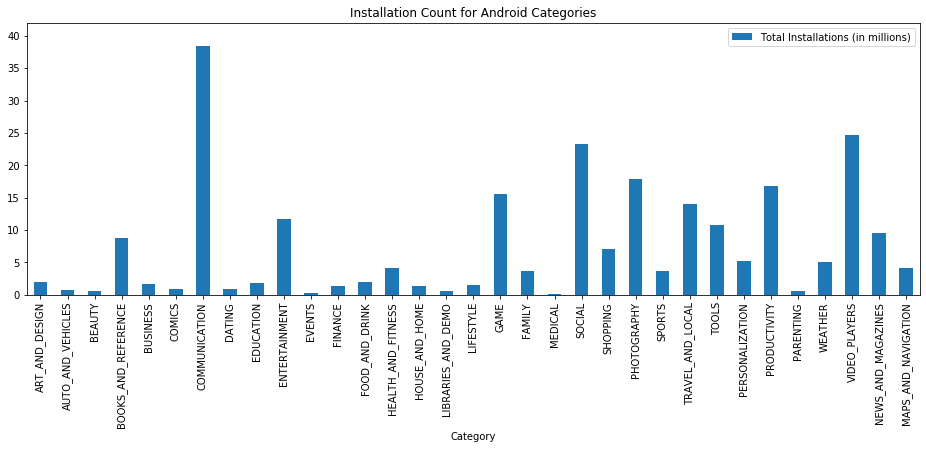

In [35]:
category_inst_android_df = pd.DataFrame(category_inst_android.items(), columns = ['Category', 'Total Installations (in millions)'])
category_inst_android_df.plot(x='Category', y='Total Installations (in millions)', kind='bar',  figsize=(16,5), title='Installation Count for Android Categories')
plt.ylim(0,42)

Here we observe that communication apps have the highest number with over 38 million installations, followed by video players (25M), social (ca. 23M), photography (ca. 18M), productivity (ca. 17M), game (ca. 16M), and travel and local (ca. 14M).

Once again, many of these figures are skewed significantly by a few apps produced by multinational companies. Let's start by looking at the category with highest number of downloads.

In [36]:
for app in android_final:
    install = app[5].replace('+','')
    install = install.replace(',','')
    app[5] = install

top_ratings_percentage(android_final, ['COMMUNICATION'], 500000000, 0, 1, 5)

WhatsApp Messenger : 1000000000
Messenger – Text and Video Chat for Free : 1000000000
Skype - free IM & video calls : 1000000000
Google Chrome: Fast & Secure : 1000000000
Gmail : 1000000000
Hangouts : 1000000000
Total genre rating count: 11036906201
Rating percentage: 54.36 %


Here we observe that six apps account for over 54% of all downloads. It would be interesting to see how the other top downloaded categories fare:

In [37]:
top_ratings_percentage(android_final, ['VIDEO_PLAYERS', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'GAME'], 100000000, 0, 1, 5)
print('\n')
top_ratings_percentage(android_final, ['SOCIAL', 'TRAVEL_AND_LOCAL'], 500000000, 0, 1, 5)

YouTube : 1000000000
Google Play Movies & TV : 1000000000
MX Player : 500000000
Total genre rating count: 3931731720
Rating percentage: 63.59 %


Google Photos : 1000000000
Total genre rating count: 4656268815
Rating percentage: 21.48 %


Microsoft Word : 500000000
Dropbox : 500000000
Google Drive : 1000000000
Google Calendar : 500000000
Cloud Print : 500000000
Total genre rating count: 5791629314
Rating percentage: 51.8 %


Candy Crush Saga : 500000000
Subway Surfers : 1000000000
Pou : 500000000
My Talking Tom : 500000000
Temple Run 2 : 500000000
Total genre rating count: 13436869450
Rating percentage: 22.33 %


Facebook : 1000000000
Google+ : 1000000000
Instagram : 1000000000
Total genre rating count: 5487861902
Rating percentage: 54.67 %


Maps - Navigate & Explore : 1000000000
Google Street View : 1000000000
Total genre rating count: 2894704086
Rating percentage: 69.09 %


The video players category and the social category each holding 3 apps taking over 63% and 54% of the market share, respectively. The photography category contains a single app with over 20% of all downloads. In productivity category and game category we see 5 apps each holding over 51% and 22% of the market, and finally, the travel and local category has 2 apps accounting for 69% of all downloads within that category. 

Looking at these numbers we see that the games and the productivity categories seem to have lower barrier to entry for new apps. The games category is particularly appealing with 5 apps holding just over one fifth of the market. Communications is another category that we examined earlier that might have potential. In the App Store we concluded that the weather category will likely be suitable for our purposes, so we might want to look at the distribution in that genre in the Play Store.

In [38]:
top_ratings_percentage(android_final, ['WEATHER'], 10000000, 0, 1, 5)

The Weather Channel: Rain Forecast & Storm Alerts : 50000000
AccuWeather: Daily Forecast & Live Weather Reports : 50000000
GO Weather - Widget, Theme, Wallpaper, Efficient : 50000000
Weather & Clock Widget for Android : 50000000
Total genre rating count: 360288520
Rating percentage: 55.51 %


Here we have 4 apps with over 55% of all downloads, which is perhaps not as promising as the games, productivity and communications categories, yet still better than the video players, social, photography, and travel and local categories.

If we would like to target both the Android and the iOS markets we might want to entertain the idea of combining categories/genres, which would target both markets to some degree and also provide a more refreshing look and functionality which might appeal to new users. This way we would target both stores without excluding a potential segment in either store and bring in a potentially novel idea. For instance, given our observations on both data sets perhaps there would be a way to integrate the game and weather categories, our top categories for each store, to appeal potential users. The same could hold true for weather and communication categories, and the possibilities for combining genres/categories in novel ways would have to be explored by the developer based on abilities, creativity and personal preferrence.

## Conclusion

In this project, we analyzed data utilizing the Android and iOS mobile app data sets publicly available on the [Kaggle](https://www.kaggle.com/) website in order to understand the traction and popularity of free apps based on a number of criteria, including genre distribution, installation numbers and review counts. The main goal of the analysis was to help a potential app developer to decide on the type of app they might want to develop, especially with the idea of revenue generation via advertisements for free apps, which for the most part depends on popularity and number of active users.

In conclusion, we determined that different genres (weather for the iOS market and games for the Android market) seem more suitable for each store, although we tried to emphasize other potential genres, such as communications and productivity, besides our initial recommendation. We proposed the idea of creating an app combining two genres for developers who would prefer to target both the Android and iOS landscape, which would not only cover both markets but also introduce a novel idea in combining different genres in the hopes of appealing to potential users.